In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Tạo dữ liệu giả lập (chuỗi thời gian)
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        sequence = np.sin(np.linspace(0, 2 * np.pi, seq_length))
        noise = np.random.normal(0, 0.1, seq_length)
        sequence += noise  # Thêm nhiễu
        X.append(sequence[:-1])  # Tất cả trừ phần tử cuối
        y.append(sequence[-1])   # Phần tử cuối là nhãn
    return np.array(X), np.array(y)

In [3]:
# Tham số
seq_length = 50
num_samples = 1000

# Tạo dữ liệu
X, y = generate_data(seq_length, num_samples)

# Chuyển đổi dữ liệu để phù hợp với đầu vào RNN
X = X.reshape((X.shape[0], X.shape[1], 1))  # (số mẫu, độ dài chuỗi, số đặc trưng)

In [4]:
X.shape

(1000, 49, 1)

In [5]:
y.shape

(1000,)

In [6]:

# Xây dựng mô hình RNN
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length-1, 1)),
    Dense(1)  # Dự đoán một giá trị
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Huấn luyện mô hình
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3206 - mae: 0.4229 - val_loss: 0.0131 - val_mae: 0.0928
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mae: 0.0871 - val_loss: 0.0107 - val_mae: 0.0830
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mae: 0.0815 - val_loss: 0.0091 - val_mae: 0.0762
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mae: 0.0793 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mae: 0.0853 - val_loss: 0.0088 - val_mae: 0.0745
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mae: 0.0782 - val_loss: 0.0092 - val_mae: 0.0762
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mae: 0.0780 - val_loss: 0.0091 - val_mae: 0.0757
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mae: 0.0777 - val_loss: 0.0089 - val_mae: 0.0745
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mae:

<Axes: >

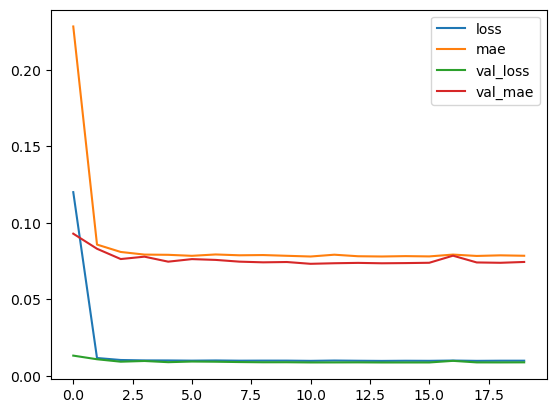

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [9]:
# Dự đoán thử nghiệm
test_input = np.sin(np.linspace(0, 2 * np.pi, seq_length - 1)).reshape((1, seq_length-1, 1))
prediction = model.predict(test_input)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.01376619]], dtype=float32)

In [10]:
y_pred = model.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
pd.DataFrame([y, y_pred]).T.head(30)

,0,1
0,0.05813,[-0.013391095]
1,0.074702,[-0.0023960276]
2,-0.122623,[0.015525253]
3,-0.058923,[0.003993408]
4,0.037888,[0.01750876]
5,-0.030344,[-0.0034303898]
6,-0.022052,[0.0031910343]
7,0.079873,[-0.008604261]
8,0.121836,[-0.0029491456]
9,0.062735,[0.01945709]


![Ảnh minh họa](img/rnn.png)

In [251]:
inputs = np.random.random([2, 3, 1]).astype(np.float32) #số chiều phải là (số mẫu, độ dài chuỗi, số đặc trưng)

In [253]:
simple_rnn = tf.keras.layers.SimpleRNN(4, return_sequences=True, return_state=True) #vector output tại mỗi state có 4 chiều

output = simple_rnn(inputs)

print(output)
# print("====")
# print(state)



# inputs = np.random.random([2, 3, 1]).astype(np.float32) #số chiều phải là (số mẫu, độ dài chuỗi, số đặc trưng)
# simple_rnn = tf.keras.layers.SimpleRNN(4, return_state=True, return_sequences=True)

# output, state = simple_rnn(inputs)

# print(output)
# print("====")
# print(state)

(<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[ 0.08149791,  0.27664125, -0.09519787,  0.2998307 ],
        [ 0.29433963,  0.28679547, -0.07361862,  0.25406042],
        [ 0.37278882,  0.43779722, -0.01847421,  0.17653778]],

       [[ 0.14859271,  0.478155  , -0.17324315,  0.51311237],
        [ 0.56352615,  0.7049257 , -0.24883671,  0.68647695],
        [ 0.7275301 ,  0.7611121 , -0.12319173,  0.4431913 ]]],
      dtype=float32)>, <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.37278882,  0.43779722, -0.01847421,  0.17653778],
       [ 0.7275301 ,  0.7611121 , -0.12319173,  0.4431913 ]],
      dtype=float32)>)


**Chú ý rằng với mỗi một điểm dữ liệu, hidden_state trả về giống hệt output của time step cuối cùng.**

In [151]:
inputs.shape

(2, 3, 2)

In [228]:
inputs

array([[[0.80383277],
        [0.09936956],
        [0.46512628]],

       [[0.06068936],
        [0.08857133],
        [0.7634123 ]]], dtype=float32)

In [230]:
inputs[0]

array([[0.80383277],
       [0.09936956],
       [0.46512628]], dtype=float32)